In [114]:
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split,KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [66]:
titanic = pd.read_csv("C:/Users/Setia Comp/Documents/MAchine Learning/Titanic_Train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
titanic.shape

(891, 12)

In [69]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


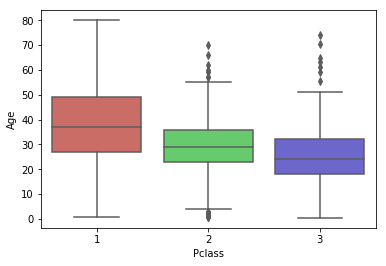

In [70]:
sb.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')

In [71]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [72]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [73]:
#Doing conversion of  categorical variables to a dummy variables
titanic_gender = pd.get_dummies(titanic['Sex'],drop_first=True)
titanic_gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [74]:
embark= pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [75]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
titanic.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [79]:
titanic_new = pd.concat([titanic,titanic_gender,embark],axis=1)
titanic_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [81]:
titanic_new.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


In [85]:
titanic_new.drop(['Fare', 'Pclass'],axis=1,inplace=True)
titanic_new.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


In [105]:
P = titanic_new.ix[:,(1,2,3,4,5,6)].values
q = titanic_new.ix[:,0].values
P_train, P_test, q_train, q_test = train_test_split(P, q, test_size
= .3, random_state=25)

In [93]:
# L1 LOSS

In [119]:
#finding best parameter using L1
Titanic1 =[0.0001,0.0002,0.0005,0.001,0.005,0.01,0.05, 0.1,0.5,
1, 10, 100,500,1000]
auc_cv=[]
for a in Titanic1:
    LOG=LogisticRegression(C=a,penalty="l1",class_weight="balanced",random_state=2)
    C = KFold(len(P_train), n_folds=10)
    score=0
    for train, test in C:
        LOG.fit(P_train[train], q_train[train])
        score+=roc_auc_score(q_train,LOG.predict(P_train))
    auc_cv.append(score/10)
    print('{:.3f}\t {:.5f}\t '.format(a,score/10))
Titanic1=np.array(Titanic1)
auc_cv=np.array(auc_cv)
c_best=Titanic1[auc_cv==max(auc_cv)][0]
print("The Value of C Best=",c_best)
q_pred = LOG.predict(P_test)
cmp = confusion_matrix(q_test, q_pred)
print("Confusion Matrix \n",cmp)

0.000	 0.50000	 
0.000	 0.50000	 
0.001	 0.50000	 
0.001	 0.50000	 
0.005	 0.50000	 
0.010	 0.50000	 
0.050	 0.77172	 
0.100	 0.77424	 
0.500	 0.77534	 
1.000	 0.77792	 
10.000	 0.77700	 
100.000	 0.77732	 
500.000	 0.77732	 
1000.000	 0.77732	 
The Value of C Best= 1.0
Confusion Matrix 
 [[137  27]
 [ 34  69]]


In [110]:
# ROC curve L1 Function

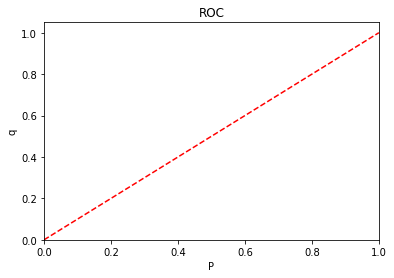

AUC Ridge =  77.7923721848


In [126]:
plt.figure()
plt.plot(label='Logistic Regression (area = %0.2f)' % max
(auc_cv))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('P')
plt.ylabel('q')
plt.title('ROC')
plt.show()
print("AUC Ridge = ",max(auc_cv)*100)

In [118]:
# L2 LOSS

In [128]:
Titanic1 =[0.0001,0.0002,0.0005,0.001,0.005,0.01,0.05, 0.1,0.5,
1, 10, 100,500,1000]
auc_cv_1=[]
for a in Titanic1:
    LOG1=LogisticRegression(C=a,penalty="l2",class_weight="balanced",random_state=2)
    C = KFold(len(X_train), n_folds=10)
    score=0
    for train, test in C:
        LOG1.fit(P_train[train], q_train[train])
        score+=roc_auc_score(q_train,LOG1.predict(P_train))
    auc_cv_1.append(score/10)
    print('{:.3f}\t {:.5f}\t '.format(a,score/10))
Titanic1=np.array(Titanic1)
auc_cv_1=np.array(auc_cv_1)
c_best=Titanic1[auc_cv_1==max(auc_cv_1)][0]
print("The Value of C Best=",c_best)
cmp = confusion_matrix(q_test, q_pred)
print("Confusion Matrix \n",cmp)

0.000	 0.50763	 
0.000	 0.51164	 
0.001	 0.52887	 
0.001	 0.58337	 
0.005	 0.76805	 
0.010	 0.76859	 
0.050	 0.77151	 
0.100	 0.77333	 
0.500	 0.77492	 
1.000	 0.77750	 
10.000	 0.77705	 
100.000	 0.77745	 
500.000	 0.77732	 
1000.000	 0.77732	 
The Value of C Best= 1.0
Confusion Matrix 
 [[137  27]
 [ 34  69]]


In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % max
(auc_cv_1))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()
print("AUC Lasso = ",max(auc_cv_1)*100)

NameError: name 'fpr' is not defined

In [130]:
print(classification_report(q_test, q_pred))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       164
          1       0.72      0.67      0.69       103

avg / total       0.77      0.77      0.77       267



In [133]:
import pandas as pd
Titanic = [['AUC Ridge ',max(auc_cv)*100],['AUC Lasso ',max(auc_cv_1)*
100]]
DATA = pd.DataFrame(Titanic,columns=['Loss Method','Accuracy'])
print(DATA)

  Loss Method   Accuracy
0  AUC Ridge   77.792372
1  AUC Lasso   77.750178


In [ ]:
# Now we can conclude that L1 Loss method has high accuracy thab L2 Loss Method.